In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install yfinance 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 31.8 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 3.0 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.1-cp310-cp310-linux_x86_64.whl size=291653 sha256=cc2f1ef589ce7671a0f13ad3bdcf79c3a8b4a28b40f48cfdba2dfef949938170
  Stored in directory: /root/.cache/pip/wheels/d7/35/5c/1374782be033462df5f40174d8d879519d64ed8c25a1977554
Successfully built peewee


In [5]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

In [6]:
start_date = datetime(2023, 2, 25)
end_date = datetime(2024, 2, 25)
tickers = ['AAPL', 'TSLA']

df = yf.download(tickers, start=start_date, end=end_date, progress=False)
df.head()

Price        Adj Close                   Close                    High  \
Ticker            AAPL        TSLA        AAPL        TSLA        AAPL   
Date                                                                     
2023-02-27  147.134644  207.630005  147.919998  207.630005  149.169998   
2023-02-28  146.627335  205.710007  147.410004  205.710007  149.080002   
2023-03-01  144.538498  202.770004  145.309998  202.770004  147.229996   
2023-03-02  145.135330  190.899994  145.910004  190.899994  146.710007   
2023-03-03  150.228134  197.789993  151.029999  197.789993  151.110001   

Price                          Low                    Open              \
Ticker            TSLA        AAPL        TSLA        AAPL        TSLA   
Date                                                                     
2023-02-27  209.419998  147.449997  201.259995  147.710007  202.029999   
2023-02-28  211.229996  146.830002  203.750000  147.050003  210.589996   
2023-03-01  207.199997  145.009995  198.520004  146.830002  206.210007   
2023-03-02  193.750000  143.899994  186.009995  144.380005  186.740005   
2023-03-03  200.479996  147.330002  192.880005  148.039993  194.800003   

Price         Volume             
Ticker          AAPL       TSLA  
Date                             
2023-02-27  44998500  161028300  
2023-02-28  50547000  153144900  
2023-03-01  55479000  156852800  
2023-03-02  52238100  181500700  
2023-03-03  70732300  154193300

In [7]:
df.tail()

Price        Adj Close                   Close                    High  \
Ticker            AAPL        TSLA        AAPL        TSLA        AAPL   
Date                                                                     
2024-02-16  182.309998  199.949997  182.309998  199.949997  184.850006   
2024-02-20  181.559998  193.759995  181.559998  193.759995  182.429993   
2024-02-21  182.320007  194.770004  182.320007  194.770004  182.889999   
2024-02-22  184.369995  197.410004  184.369995  197.410004  184.960007   
2024-02-23  182.520004  191.970001  182.520004  191.970001  185.039993   

Price                          Low                    Open              \
Ticker            TSLA        AAPL        TSLA        AAPL        TSLA   
Date                                                                     
2024-02-16  203.169998  181.669998  197.399994  183.419998  202.059998   
2024-02-20  198.600006  180.000000  189.130005  181.789993  196.130005   
2024-02-21  199.440002  180.660004  191.949997  181.940002  193.360001   
2024-02-22  198.320007  182.460007  191.360001  183.479996  194.000000   
2024-02-23  197.570007  182.229996  191.500000  185.009995  195.309998   

Price         Volume             
Ticker          AAPL       TSLA  
Date                             
2024-02-16  49701400  111173600  
2024-02-20  53665600  104545800  
2024-02-21  41529700  103844000  
2024-02-22  52292200   92739500  
2024-02-23  45074500   78670300

In [8]:
df = df.drop(['Adj Close'], axis = 1)
df.head()

Price            Close                    High                     Low  \
Ticker            AAPL        TSLA        AAPL        TSLA        AAPL   
Date                                                                     
2023-02-27  147.919998  207.630005  149.169998  209.419998  147.449997   
2023-02-28  147.410004  205.710007  149.080002  211.229996  146.830002   
2023-03-01  145.309998  202.770004  147.229996  207.199997  145.009995   
2023-03-02  145.910004  190.899994  146.710007  193.750000  143.899994   
2023-03-03  151.029999  197.789993  151.110001  200.479996  147.330002   

Price                         Open                Volume             
Ticker            TSLA        AAPL        TSLA      AAPL       TSLA  
Date                                                                 
2023-02-27  201.259995  147.710007  202.029999  44998500  161028300  
2023-02-28  203.750000  147.050003  210.589996  50547000  153144900  
2023-03-01  198.520004  146.830002  206.210007  55479000  156852800  
2023-03-02  186.009995  144.380005  186.740005  52238100  181500700  
2023-03-03  192.880005  148.039993  194.800003  70732300  154193300

In [9]:
df.reset_index(inplace=True)
df.drop(columns=['Date'])

/tmp/ipykernel_33/1355882422.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df.drop(columns=['Date'])


Price        Close                    High                     Low  \
Ticker        AAPL        TSLA        AAPL        TSLA        AAPL   
0       147.919998  207.630005  149.169998  209.419998  147.449997   
1       147.410004  205.710007  149.080002  211.229996  146.830002   
2       145.309998  202.770004  147.229996  207.199997  145.009995   
3       145.910004  190.899994  146.710007  193.750000  143.899994   
4       151.029999  197.789993  151.110001  200.479996  147.330002   
..             ...         ...         ...         ...         ...   
245     182.309998  199.949997  184.850006  203.169998  181.669998   
246     181.559998  193.759995  182.429993  198.600006  180.000000   
247     182.320007  194.770004  182.889999  199.440002  180.660004   
248     184.369995  197.410004  184.960007  198.320007  182.460007   
249     182.520004  191.970001  185.039993  197.570007  182.229996   

Price                     Open                Volume             
Ticker        TSLA        AAPL        TSLA      AAPL       TSLA  
0       201.259995  147.710007  202.029999  44998500  161028300  
1       203.750000  147.050003  210.589996  50547000  153144900  
2       198.520004  146.830002  206.210007  55479000  156852800  
3       186.009995  144.380005  186.740005  52238100  181500700  
4       192.880005  148.039993  194.800003  70732300  154193300  
..             ...         ...         ...       ...        ...  
245     197.399994  183.419998  202.059998  49701400  111173600  
246     189.130005  181.789993  196.130005  53665600  104545800  
247     191.949997  181.940002  193.360001  41529700  103844000  
248     191.360001  183.479996  194.000000  52292200   92739500  
249     191.500000  185.009995  195.309998  45074500   78670300  

[250 rows x 10 columns]

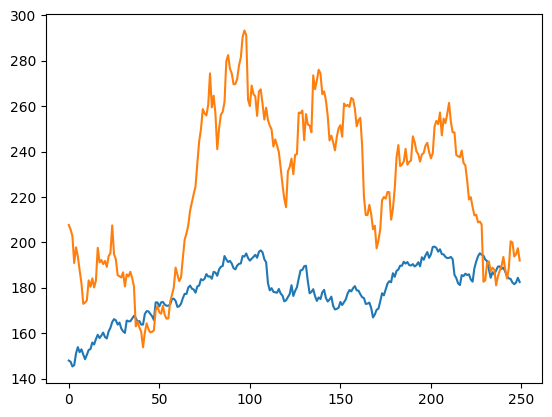

In [10]:
plt.plot(df.Close)

In [11]:
df

Price        Date       Close                    High                     Low  \
Ticker                   AAPL        TSLA        AAPL        TSLA        AAPL   
0      2023-02-27  147.919998  207.630005  149.169998  209.419998  147.449997   
1      2023-02-28  147.410004  205.710007  149.080002  211.229996  146.830002   
2      2023-03-01  145.309998  202.770004  147.229996  207.199997  145.009995   
3      2023-03-02  145.910004  190.899994  146.710007  193.750000  143.899994   
4      2023-03-03  151.029999  197.789993  151.110001  200.479996  147.330002   
..            ...         ...         ...         ...         ...         ...   
245    2024-02-16  182.309998  199.949997  184.850006  203.169998  181.669998   
246    2024-02-20  181.559998  193.759995  182.429993  198.600006  180.000000   
247    2024-02-21  182.320007  194.770004  182.889999  199.440002  180.660004   
248    2024-02-22  184.369995  197.410004  184.960007  198.320007  182.460007   
249    2024-02-23  182.520004  191.970001  185.039993  197.570007  182.229996   

Price                     Open                Volume             
Ticker        TSLA        AAPL        TSLA      AAPL       TSLA  
0       201.259995  147.710007  202.029999  44998500  161028300  
1       203.750000  147.050003  210.589996  50547000  153144900  
2       198.520004  146.830002  206.210007  55479000  156852800  
3       186.009995  144.380005  186.740005  52238100  181500700  
4       192.880005  148.039993  194.800003  70732300  154193300  
..             ...         ...         ...       ...        ...  
245     197.399994  183.419998  202.059998  49701400  111173600  
246     189.130005  181.789993  196.130005  53665600  104545800  
247     191.949997  181.940002  193.360001  41529700  103844000  
248     191.360001  183.479996  194.000000  52292200   92739500  
249     191.500000  185.009995  195.309998  45074500   78670300  

[250 rows x 11 columns]

In [12]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL,TSLA
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
245,184.9763,227.6724
246,185.0723,227.1688
247,185.1912,226.7115
248,185.3280,226.2218


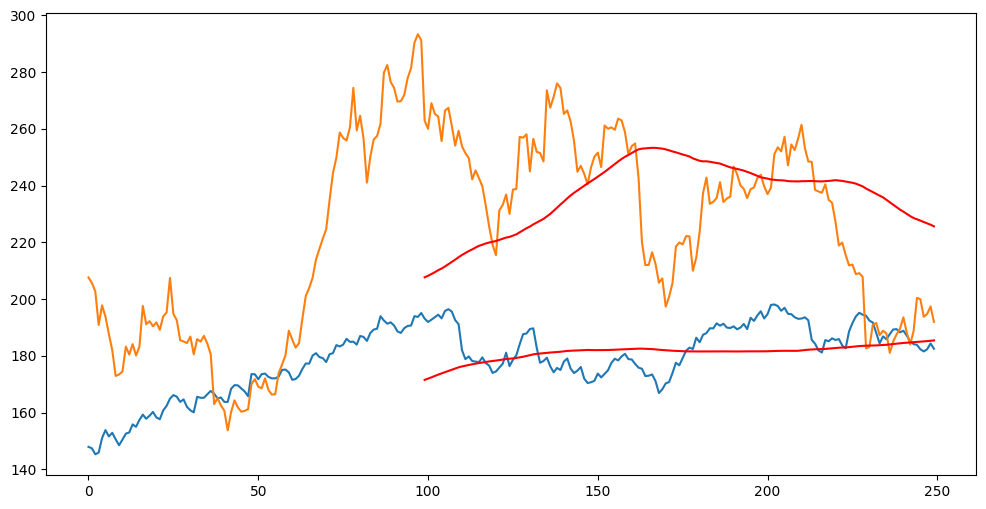

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [14]:
df. shape

(250, 11)

In [15]:
#splitting  Data into Training and Testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(175, 2)
(75, 2)


In [16]:
data_training.head()

Ticker,AAPL,TSLA
0,147.919998,207.630005
1,147.410004,205.710007
2,145.309998,202.770004
3,145.910004,190.899994
4,151.029999,197.789993


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.05103638, 0.38598758],
       [0.04106387, 0.37223303],
       [0.        , 0.35117133],
       [0.01173262, 0.26613651],
       [0.11184985, 0.31549534],
       [0.16660157, 0.2869833 ],
       [0.12299587, 0.24328396],
       [0.14782944, 0.2023784 ],
       [0.10324597, 0.13733074],
       [0.06237783, 0.14105597],
       [0.10089956, 0.14850631],
       [0.1423543 , 0.21140479],
       [0.15017614, 0.19127443],
       [0.20610107, 0.21763741],
       [0.18947991, 0.18898206],
       [0.23640979, 0.2113332 ],
       [0.27317171, 0.31399099],
       [0.24481823, 0.26792747],
       [0.26632764, 0.27559282],
       [0.29213928, 0.2626263 ],
       [0.25361755, 0.27265562],
       [0.24129833, 0.25388641],
       [0.30230753, 0.28748482],
       [0.33339858, 0.29751415],
       [0.38306603, 0.38476974],
       [0.4078999 , 0.29386063],
       [0.39734078, 0.27817181],
       [0.36077429, 0.22759514],
       [0.37837322, 0.22429972],
       [0.32694567, 0.22035959],
       [0.

In [19]:
data_training_array.shape

(175, 2)

In [20]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
x_train.shape

(75, 100, 2)

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [23]:
model = tf.keras.Sequential()
model.add(LSTM(units=50, activation = 'relu' ,return_sequences = True,
               input_shape = (x_train.shape[1], 2)))
model.add(Dropout(0.1))

model = Sequential()
model.add(LSTM(units=60, activation = 'relu' ,return_sequences = True))
model.add(Dropout(0.2))

model = Sequential()
model.add(LSTM(units=80, activation = 'relu' ,return_sequences = True))
model.add(Dropout(0.3))

model = Sequential()
model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [24]:
input_shape = (None,x_train.shape[1], 2)
model.build(input_shape)

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 120)               59040     
                                                                 
 dropout_3 (Dropout)         (None, 120)               0         
                                                                 
 dense (Dense)               (None, 2)                 242       
                                                                 
Total params: 59282 (231.57 KB)
Trainable params: 59282 (231.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# Assuming x_train has shape (None, 100, 2)
# Selecting the first feature
x_train_single_feature = x_train[:, :, 0:1]

# Now x_train_single_feature has shape (None, 100, 1)

# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.fit(x_train_single_feature, y_train, epochs=50)

Epoch 1/50


ValueError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).
    
    Input 0 of layer "lstm_3" is incompatible with the layer: expected shape=(None, None, 2), found shape=(None, 100, 1)
    
    Call arguments received by layer 'sequential_3' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 100, 1), dtype=float32)
      • training=True
      • mask=None


In [27]:
model.save('keras_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
data_testing.head()

Ticker,AAPL,TSLA
175,179.229996,219.270004
176,181.820007,222.179993
177,182.889999,222.110001
178,182.410004,209.979996
179,186.399994,214.649994


In [29]:
data_testing.shape

(75, 2)

In [30]:
data_training.tail(100)

Ticker,AAPL,TSLA
75,183.949997,256.790009
76,186.009995,255.899994
77,184.919998,260.540009
78,185.009995,274.450012
79,183.960007,259.459991
...,...,...
170,170.289993,197.360001
171,170.770004,200.839996
172,173.970001,205.660004
173,177.570007,218.509995


In [31]:
past_100_days = data_training.tail(100)

In [32]:
final_df = pd.concat([past_100_days,data_testing],ignore_index=True)

In [33]:
final_df.head()

Ticker,AAPL,TSLA
0,183.949997,256.790009
1,186.009995,255.899994
2,184.919998,260.540009
3,185.009995,274.450012
4,183.960007,259.459991


In [34]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.54644449, 0.67447463],
       [0.61242775, 0.66654789],
       [0.57751435, 0.70787328],
       [0.580397  , 0.83176003],
       [0.54676511, 0.69825432],
       [0.64413837, 0.74412174],
       [0.63388829, 0.67278241],
       [0.58872531, 0.53428933],
       [0.67809088, 0.61587112],
       [0.71620755, 0.669576  ],
       [0.72709789, 0.68079803],
       [0.86739272, 0.71882786],
       [0.81902647, 0.87958684],
       [0.78283157, 0.90327765],
       [0.79820619, 0.85037417],
       [0.76201129, 0.83158173],
       [0.69570789, 0.78865327],
       [0.67873163, 0.79025661],
       [0.73286368, 0.80985032],
       [0.757527  , 0.86248662],
       [0.76233191, 0.89348066],
       [0.86803347, 0.97363741],
       [0.85970517, 1.        ],
       [0.90358762, 0.981475  ],
       [0.84048701, 0.72889203],
       [0.80237034, 0.70324183],
       [0.82831517, 0.78375491],
       [0.85618176, 0.75008908],
       [0.88436898, 0.74180628],
       [0.84336966, 0.66485581],
       [0.

In [35]:
input_data.shape

(175, 2)

In [36]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [37]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(75, 100, 2)
(75,)


In [38]:
# Making predictions

y_pred = model.predict(x_test)

3/3 [==============================] - 0s 22ms/step


In [39]:
x_test, y_test = np.array(x_test), np.array(y_test)
#y_predicted = model.predict(x_test)
#scaler = scaler.scale_
print(x_test.shape)
print(y_test.shape)

(75, 100, 2)
(75,)


In [40]:
y_predicted = model.predict(x_test)

3/3 [==============================] - 0s 29ms/step


In [41]:
print("Original x_test shape:", x_test.shape)
#print("Reshaped x_test shape:", x_test_reshaped.shape)

Original x_test shape: (75, 100, 2)


In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 120)               59040     
                                                                 
 dropout_3 (Dropout)         (None, 120)               0         
                                                                 
 dense (Dense)               (None, 2)                 242       
                                                                 
Total params: 59282 (231.57 KB)
Trainable params: 59282 (231.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [44]:
#y_predicted = model.predict(x_test)
y_predicted.shape

(75, 2)

In [45]:
y_test

array([0.39525932, 0.47821933, 0.51249197, 0.49711735, 0.62491972,
       0.57367082, 0.65823197, 0.67648925, 0.73094191, 0.73030116,
       0.7866751 , 0.76073027, 0.78219081, 0.73926973, 0.73350394,
       0.75304272, 0.72005108, 0.73862898, 0.77994892, 0.72197285,
       0.84977571, 0.81454218, 0.87700204, 0.9231264 , 0.84208816,
       0.89109565, 0.99519558, 1.        , 0.98270361, 0.9288917 ,
       0.96252408, 0.89493918, 0.89013428, 0.8555415 , 0.83792449,
       0.84112727, 0.85490075, 0.82126837, 0.60057653, 0.55605381,
       0.48110198, 0.45771918, 0.59801401, 0.58456116, 0.61819354,
       0.59897489, 0.6095451 , 0.5361949 , 0.5057653 , 0.69634864,
       0.7901985 , 0.8648302 , 0.90614965, 0.88436898, 0.87379877,
       0.81774496, 0.79564367, 0.67745013, 0.56085823, 0.63965408,
       0.6073032 , 0.66591904, 0.71780919, 0.72133259, 0.68641919,
       0.70339545, 0.64894278, 0.58135789, 0.55285054, 0.54356184,
       0.49391408, 0.46989102, 0.4942347 , 0.55989734, 0.50064

In [46]:
y_predicted

array([[-0.01068611,  0.00943858],
       [-0.01098055,  0.0108765 ],
       [-0.01112137,  0.01282399],
       [-0.01101066,  0.01478261],
       [-0.00978194,  0.01645778],
       [-0.00903704,  0.01944388],
       [-0.00920309,  0.02104498],
       [-0.01039245,  0.0229742 ],
       [-0.01176911,  0.02456143],
       [-0.01180836,  0.0264332 ],
       [-0.01174131,  0.02811653],
       [-0.0117295 ,  0.03016788],
       [-0.01216464,  0.03153941],
       [-0.01195492,  0.03285443],
       [-0.0118473 ,  0.03350183],
       [-0.01189214,  0.03388002],
       [-0.01289219,  0.03435577],
       [-0.01360064,  0.03422117],
       [-0.01366483,  0.03410792],
       [-0.01348039,  0.03458115],
       [-0.01316458,  0.03434512],
       [-0.01305029,  0.03573483],
       [-0.01300177,  0.03653152],
       [-0.01319856,  0.03791428],
       [-0.01337634,  0.03961022],
       [-0.01318758,  0.04004915],
       [-0.01281106,  0.041095  ],
       [-0.01260752,  0.04336452],
       [-0.01327613,

In [47]:
scaler.scale_

array([0.03203075, 0.00890631])

In [48]:
scale_factor = 1/0.02018978
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

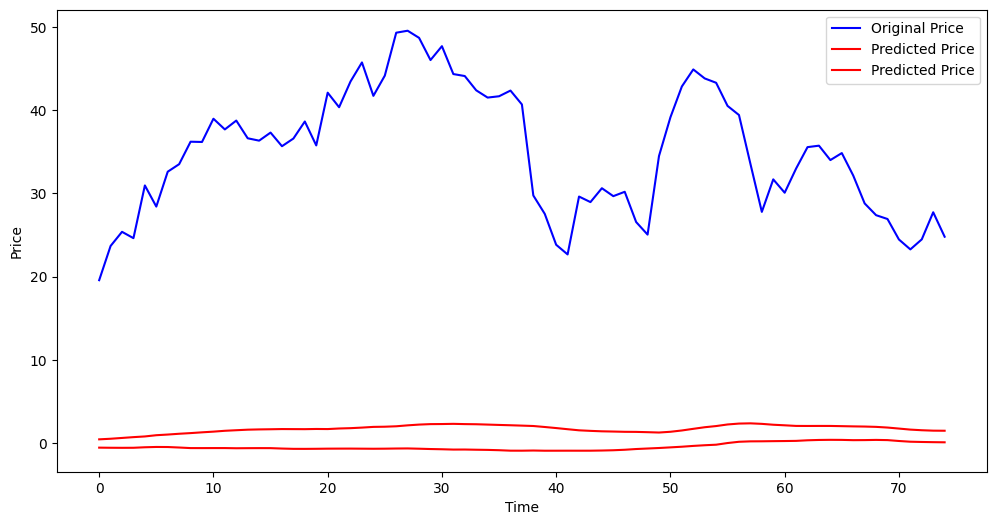

In [49]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted , 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()